In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

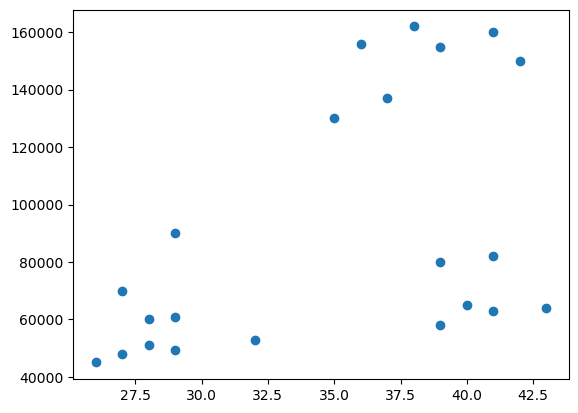

In [4]:
plt.scatter(df.Age, df['Income($)'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [8]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


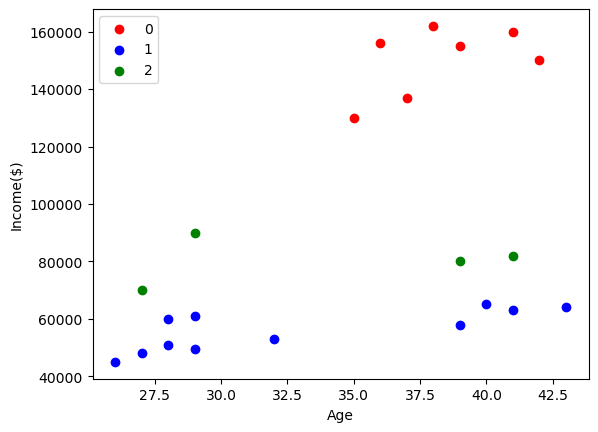

In [9]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'red')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'green')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['0','1','2'])

# There is a problem. This probelm is due to scalling income has high and Age has low. Therefore we have to scale

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [12]:
y_pred_new = km.fit_predict(df[['Age', 'Income($)']])
y_pred_new

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
df['new_cluster'] = y_pred_new
df.head()

,Name,Age,Income($),cluster,new_cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,1,0
3,Ismail,0.117647,0.128205,1,0
4,Kory,0.941176,0.897436,0,1


In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

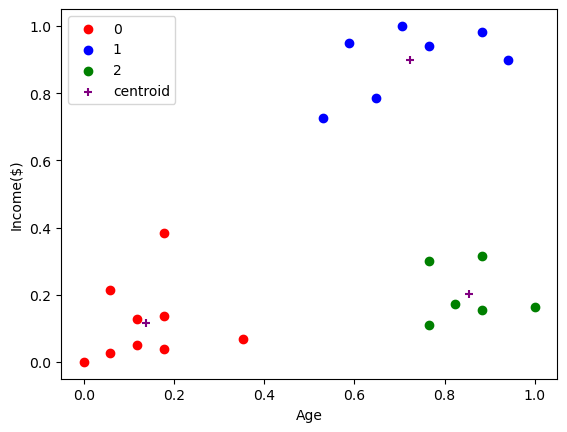

In [15]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'red', label = '0')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue', label = '1')
plt.scatter(df2.Age, df2['Income($)'], color = 'green', label = '2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='+', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [16]:
k_range = range(1,10)
sse = []
for k in k_range:
    km =KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [17]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2766936276300279,
 0.21055478995472493,
 0.16858512236029757,
 0.13762504146528043,
 0.10497488680620906]

Text(0, 0.5, 'SSE')

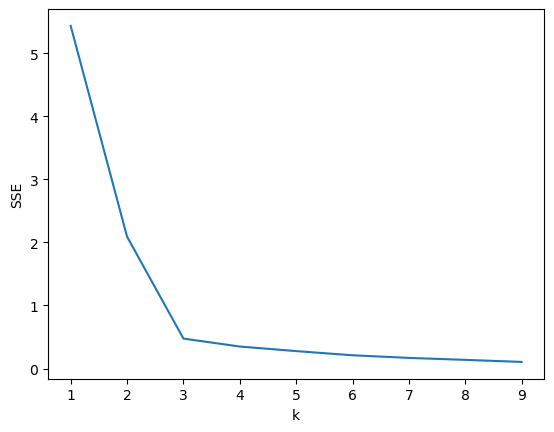

In [18]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('SSE')